In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
import os

In [ ]:
# The spectra are of the type spectrum.MSSpectrum with kernel spectrum.ppk_wrapper
# on load:
#    path = <data path>
#    ms.correct_for_ionisation = True
#    ms.normalise = True
#    ms.filter = spectrum_filters.filter_by_frozen_dag
#    ms.load(os.path.join(path, 'spec', spectrum_id + '.ms'))

# The fingerprints -- molecular_fingerprints.fingerprint_kernel (works on FPs, though)

# The BGCs -- bgc.wv_kernel

# bgc loader:
# loads BGC dir (id list?), 
# assembles dictionary
# loads metabolite structures

# spectra loader:
# loads spectra dir (id list?)
# loads metabolite structures

# init fp training set from combined structures (spectra, bgcs)!!!

# Training sets:
# ms2-fp: iokr
# bgc-fp: mibig (total!) run on 1.4 because BiG-SCAPE aligns the Pfam domains and only includes MIBiG 1.4
# test set: gnps-mibig

def get_kernel_vector_for_sample(ms, training_set, kernel_function):
    kernel_vector = []
    
    ms_auto = kernel_function(ms, ms)
    for t_ms in training_set:
        t_ms_auto = kernel_function(t_ms)
        ms_t_ms = kernel_function(ms, t_ms)
        kernel_value = ms_t_ms / numpy.sqrt(ms_auto, t_ms_auto)
        kernel_vector.append(kernel_value)
        
    return kernel_vector

def normalise_kernel(matrix):
    return matrix / numpy.sqrt(numpy.outer(matrix.diagonal(), matrix.diagonal()))

In [ ]:
# BGC loader function test

In [49]:
import bgc

mibig_structure_file = "/home/grimur/_iokr/data/mibig/compunds_structures_1.4.csv"
pfs_data_dir = "/home/grimur/mibig_kernel_test/cache/pfs"

bgc_corpus = bgc.load_data_dir(mibig_structure_file, pfs_data_dir)

building word vectors from 2236 words


In [50]:
sample_bgc = bgc_corpus.documents[0]
print(sample_bgc.bgc_id)
# print(sample_bgc.words)
# print(sample_bgc.metabolites)
# print(sample_bgc.word_vector)
b1, b2 = bgc_corpus.documents[:2]
print(bgc.wv_kernel(b1.word_vector, b2.word_vector))
print(bgc.wv_kernel(b1.word_vector, b1.word_vector))

BGC0000929
0.5655254386995371
1.0


In [ ]:
# MS2 loader function test

In [9]:
import scipy
import scipy.io

In [12]:
datapath = '/home/grimur/git/nplinker/nplinker/prototype/nplinker/scoring/iokr/data'

spectra = datapath + os.sep + "spectra.txt"
spectra_folder = datapath + os.sep + 'SPEC'
gnps_mat = datapath + os.sep + "data_GNPS.mat"

In [24]:
import spectrum_filters
spectrum_filters.datapath = datapath
import spectrum

In [14]:
# Probably not even using the precalculated matrix???
# r = scipy.io.loadmat(gnps_mat)

In [36]:
ms2_objects = spectrum.load_data_dir(spectra, spectra_folder, spectrum_filters.filter_by_frozen_dag)

In [44]:
sample_ms2 = ms2_objects[0]
print(sample_ms2.spectrum_id)
sample_ms1, sample_ms2 = ms2_objects[:2]
print(spectrum.ppk_wrapper(sample_ms1.spectrum, sample_ms2.spectrum))
print(spectrum.ppk_wrapper(sample_ms1.spectrum, sample_ms1.spectrum))

CCMSLIB00000001570
0.184402182972808
1.0


In [45]:
# metabolite loader function test

In [53]:
sample_ms2.metabolite
sample_bgc.metabolites

['CN1C2=NC(=O)N(C(=O)C2=NC=N1)C']

In [68]:
import metabolite

In [111]:
metabolite_server = metabolite.MetaboliteServer()

In [70]:
print('add structure from ms2')
for m in ms2_objects[:5]:
    metabolite_server.add_metabolite(m.metabolite)
print('add structure from bgc')
for b in bgc_corpus.documents[:5]:
    for structure in b.metabolites:
        metabolite_server.add_metabolite(structure)

Adding metabolite GRJSOZDXIUZXEW-UHFFFAOYSA-N
Adding metabolite VCAGNEUDNVLWPT-UHFFFAOYSA-N
Adding metabolite QURRTAYEASAREY-UHFFFAOYSA-N
Adding metabolite NHKCCADZVLTPPO-UHFFFAOYSA-N
Adding metabolite VCQKVUNLUXMOER-UHFFFAOYSA-N
Adding metabolite SLGRAIAQIAUZAQ-UHFFFAOYSA-N
Adding metabolite OPQNCARIZFLNLF-JBHFWYGFSA-N
Adding metabolite APYNVIXJDXCVNV-UAMRSGIDSA-N
Adding metabolite SBSRDDBYEIPHHD-IVCUCATHSA-N
Adding metabolite QUZNSWBEDCHESP-PGAURXIQSA-N
Adding metabolite HFNMIOGEGCXSJX-CFARKNKGSA-N
Adding metabolite UIBDXMJAGQYGAG-NYBNEGNOSA-N
Adding metabolite UIBDXMJAGQYGAG-NYBNEGNOSA-N
Adding metabolite UVBUBMSSQKOIBE-UHFFFAOYSA-N
Adding metabolite NUPNVWUYFVEAIT-UJJBCWTCSA-N


In [73]:
print('get structure from ms2')
for m in ms2_objects[10:15]:
    print(metabolite_server.get_metabolite(m.metabolite))
print('get structure from bgc')
for b in bgc_corpus.documents[10:15]:
    for structure in b.metabolites:
        print(metabolite_server.get_metabolite(structure))

get structure from ms2
{'inchi': 'InChI=1S/C28H26N4O3/c1-28-26(34-3)17(29-2)12-20(35-28)31-18-10-6-4-8-14(18)22-23-16(13-30-27(23)33)21-15-9-5-7-11-19(15)32(28)25(21)24(22)31/h4-11,17,20,26,29H,12-13H2,1-3H3,(H,30,33)', 'fingerprint': array([1., 0., 0., ..., 0., 0., 0.])}
{'inchi': 'InChI=1S/C22H37NO6/c1-12(7-6-8-16(11-24)21(23)27)18(25)14(3)19(26)15(4)20-13(2)17-9-10-22(5,28-17)29-20/h6-8,12-15,17-20,24-26H,9-11H2,1-5H3,(H2,23,27)', 'fingerprint': array([0., 0., 0., ..., 0., 0., 0.])}
{'inchi': 'InChI=1S/C10H16N2O4S3/c1-3-12-8-4-6(2)18(13,14)10-7(8)5-9(17-10)19(11,15)16/h5-6,8,12H,3-4H2,1-2H3,(H2,11,15,16)', 'fingerprint': array([0., 0., 0., ..., 0., 0., 0.])}
{'inchi': 'InChI=1S/C10H16N2O4S3/c1-3-12-8-4-6(2)18(13,14)10-7(8)5-9(17-10)19(11,15)16/h5-6,8,12H,3-4H2,1-2H3,(H2,11,15,16)', 'fingerprint': array([0., 0., 0., ..., 0., 0., 0.])}
{'inchi': 'InChI=1S/C10H16N2O4S3/c1-3-12-8-4-6(2)18(13,14)10-7(8)5-9(17-10)19(11,15)16/h5-6,8,12H,3-4H2,1-2H3,(H2,11,15,16)', 'fingerprint': array([0.,

In [80]:
import molecular_fingerprints
ms_obj = ms2_objects[15].metabolite
fp1 = metabolite_server.get_metabolite(ms_obj)['fingerprint']
bgc_obj = bgc_corpus.documents[15].metabolites[0]
fp2 = metabolite_server.get_metabolite(bgc_obj)['fingerprint']
print(molecular_fingerprints.fingerprint_kernel(fp1, fp2))
# ok that this is not 1 because the kernel is not normalised.
print(molecular_fingerprints.fingerprint_kernel(fp1, fp1))
print(molecular_fingerprints.fingerprint_kernel(fp2, fp2))

0.6126263941844161
0.9900498337491681
0.9900498337491681


In [2]:
# Actual processing starts here!

In [3]:
import numpy
import os

In [4]:
import metabolite

['/home/grimur/miniconda2/envs/jupyter-py3/lib/python3.7/site-packages/cdk_pywrapper']
Server process already running: True


In [5]:
metabolite_server = metabolite.MetaboliteServer()

In [6]:
# load bgcs

In [7]:
import bgc

mibig_structure_file = "/home/grimur/_iokr/data/mibig/compunds_structures_1.4.csv"
pfs_data_dir = "/home/grimur/mibig_kernel_test/cache/pfs"

bgc_corpus = bgc.load_data_dir(mibig_structure_file, pfs_data_dir)


building word vectors from 2236 words


In [8]:
bgc_list = bgc_corpus.documents

bgc_training_set_wv = []
bgc_training_set_metabolites = []
bgc_training_set_ids = []

count = 0
for bgc_item in bgc_list:
    count += 1
    # sort of expect 50% increase in success due to multiple structures for BGCs
    if count % 100 == 0:
        print('{} / {}, {} success'.format(count, len(bgc_list), len(bgc_training_set_metabolites)))
    for structure in bgc_item.metabolites:
        try:
            metabolite_server.add_metabolite(structure)
            success = True
        except:
            success = False

        if success:
            bgc_training_set_wv.append(bgc_item.word_vector)
            bgc_training_set_metabolites.append(structure)
            bgc_training_set_ids.append(bgc_item.bgc_id)



100 / 1200, 143 success
200 / 1200, 276 success
300 / 1200, 401 success
400 / 1200, 551 success
500 / 1200, 689 success
600 / 1200, 857 success
700 / 1200, 1009 success
800 / 1200, 1125 success
900 / 1200, 1236 success
1000 / 1200, 1373 success
1100 / 1200, 1540 success
1200 / 1200, 1682 success


In [9]:
print('calculate kernel')
total = len(bgc_training_set_wv) ** 2 / 2
count = 0
K_z = numpy.zeros((len(bgc_training_set_wv), len(bgc_training_set_wv)))
for v1_idx in range(len(bgc_training_set_wv)):
    for v2_idx in range(v1_idx + 1):
        count += 1
        if count % 10000 == 0:
            print('{} / {}'.format(count, total))
        v1 = bgc_training_set_wv[v1_idx]
        v2 = bgc_training_set_wv[v2_idx]
        k_v1_v2 = bgc.wv_kernel(v1, v2)
        K_z[v1_idx, v2_idx] = k_v1_v2
        K_z[v2_idx, v1_idx] = k_v1_v2
    

calculate kernel
10000 / 1416244.5
20000 / 1416244.5
30000 / 1416244.5
40000 / 1416244.5
50000 / 1416244.5
60000 / 1416244.5
70000 / 1416244.5
80000 / 1416244.5
90000 / 1416244.5
100000 / 1416244.5
110000 / 1416244.5
120000 / 1416244.5
130000 / 1416244.5
140000 / 1416244.5
150000 / 1416244.5
160000 / 1416244.5
170000 / 1416244.5
180000 / 1416244.5
190000 / 1416244.5
200000 / 1416244.5
210000 / 1416244.5
220000 / 1416244.5
230000 / 1416244.5
240000 / 1416244.5
250000 / 1416244.5
260000 / 1416244.5
270000 / 1416244.5
280000 / 1416244.5
290000 / 1416244.5
300000 / 1416244.5
310000 / 1416244.5
320000 / 1416244.5
330000 / 1416244.5
340000 / 1416244.5
350000 / 1416244.5
360000 / 1416244.5
370000 / 1416244.5
380000 / 1416244.5
390000 / 1416244.5
400000 / 1416244.5
410000 / 1416244.5
420000 / 1416244.5
430000 / 1416244.5
440000 / 1416244.5
450000 / 1416244.5
460000 / 1416244.5
470000 / 1416244.5
480000 / 1416244.5
490000 / 1416244.5
500000 / 1416244.5
510000 / 1416244.5
520000 / 1416244.5
5300

In [10]:
# load ms2

In [11]:
datapath = '/home/grimur/git/nplinker/nplinker/prototype/nplinker/scoring/iokr/data'

spectra = datapath + os.sep + "spectra.txt"
spectra_folder = datapath + os.sep + 'SPEC'

In [12]:
import spectrum_filters
spectrum_filters.datapath = datapath
import spectrum

In [13]:
ms2_objects = spectrum.load_data_dir(spectra, spectra_folder, spectrum_filters.filter_by_frozen_dag)

In [14]:
ms_training_set_ids = []
ms_training_set_spectra = []
ms_training_set_metabolites = []

count = 0
for ms_object in ms2_objects:
    count += 1
    if count % 100 == 0:
        print('{} / {}, {} success'.format(count, len(ms2_objects), len(ms_training_set_metabolites)))
    try:
        metabolite_server.add_metabolite(ms_object.metabolite)
        success = True
    except:
        success = False
    if success:
        ms_training_set_metabolites.append(ms_object.metabolite)
        ms_training_set_spectra.append(ms_object.spectrum)
        ms_training_set_ids.append(ms_object.spectrum_id)
    
print('calculate kernel')
total = len(ms_training_set_ids) ** 2 / 2
count = 0
K_x = numpy.zeros((len(ms_training_set_ids), len(ms_training_set_ids)))
for v1_idx in range(len(ms_training_set_spectra)):
    for v2_idx in range(v1_idx + 1):
        count += 1
        if count % 10000 == 0:
            print('{} / {}'.format(count, total))
        v1 = ms_training_set_spectra[v1_idx]
        v2 = ms_training_set_spectra[v2_idx]
        k_v1_v2 = spectrum.ppk_wrapper(v1, v2)
        K_x[v1_idx, v2_idx] = k_v1_v2
        K_x[v2_idx, v1_idx] = k_v1_v2

100 / 4138, 99 success
200 / 4138, 199 success
300 / 4138, 299 success
400 / 4138, 399 success
500 / 4138, 499 success
600 / 4138, 599 success
700 / 4138, 699 success
800 / 4138, 799 success
900 / 4138, 899 success
1000 / 4138, 999 success
1100 / 4138, 1099 success
1200 / 4138, 1199 success
1300 / 4138, 1299 success
1400 / 4138, 1399 success
1500 / 4138, 1499 success
1600 / 4138, 1599 success
1700 / 4138, 1699 success
1800 / 4138, 1799 success
1900 / 4138, 1899 success
2000 / 4138, 1999 success
2100 / 4138, 2099 success
2200 / 4138, 2199 success
2300 / 4138, 2299 success
2400 / 4138, 2399 success
2500 / 4138, 2499 success
2600 / 4138, 2599 success
2700 / 4138, 2699 success
2800 / 4138, 2799 success
2900 / 4138, 2899 success
3000 / 4138, 2999 success
3100 / 4138, 3099 success
3200 / 4138, 3199 success
3300 / 4138, 3299 success
3400 / 4138, 3399 success
3500 / 4138, 3499 success
3600 / 4138, 3599 success
3700 / 4138, 3699 success
3800 / 4138, 3799 success
3900 / 4138, 3899 success
4000 /

3630000 / 8561522.0
3640000 / 8561522.0
3650000 / 8561522.0
3660000 / 8561522.0
3670000 / 8561522.0
3680000 / 8561522.0
3690000 / 8561522.0
3700000 / 8561522.0
3710000 / 8561522.0
3720000 / 8561522.0
3730000 / 8561522.0
3740000 / 8561522.0
3750000 / 8561522.0
3760000 / 8561522.0
3770000 / 8561522.0
3780000 / 8561522.0
3790000 / 8561522.0
3800000 / 8561522.0
3810000 / 8561522.0
3820000 / 8561522.0
3830000 / 8561522.0
3840000 / 8561522.0
3850000 / 8561522.0
3860000 / 8561522.0
3870000 / 8561522.0
3880000 / 8561522.0
3890000 / 8561522.0
3900000 / 8561522.0
3910000 / 8561522.0
3920000 / 8561522.0
3930000 / 8561522.0
3940000 / 8561522.0
3950000 / 8561522.0
3960000 / 8561522.0
3970000 / 8561522.0
3980000 / 8561522.0
3990000 / 8561522.0
4000000 / 8561522.0
4010000 / 8561522.0
4020000 / 8561522.0
4030000 / 8561522.0
4040000 / 8561522.0
4050000 / 8561522.0
4060000 / 8561522.0
4070000 / 8561522.0
4080000 / 8561522.0
4090000 / 8561522.0
4100000 / 8561522.0
4110000 / 8561522.0
4120000 / 8561522.0


7730000 / 8561522.0
7740000 / 8561522.0
7750000 / 8561522.0
7760000 / 8561522.0
7770000 / 8561522.0
7780000 / 8561522.0
7790000 / 8561522.0
7800000 / 8561522.0
7810000 / 8561522.0
7820000 / 8561522.0
7830000 / 8561522.0
7840000 / 8561522.0
7850000 / 8561522.0
7860000 / 8561522.0
7870000 / 8561522.0
7880000 / 8561522.0
7890000 / 8561522.0
7900000 / 8561522.0
7910000 / 8561522.0
7920000 / 8561522.0
7930000 / 8561522.0
7940000 / 8561522.0
7950000 / 8561522.0
7960000 / 8561522.0
7970000 / 8561522.0
7980000 / 8561522.0
7990000 / 8561522.0
8000000 / 8561522.0
8010000 / 8561522.0
8020000 / 8561522.0
8030000 / 8561522.0
8040000 / 8561522.0
8050000 / 8561522.0
8060000 / 8561522.0
8070000 / 8561522.0
8080000 / 8561522.0
8090000 / 8561522.0
8100000 / 8561522.0
8110000 / 8561522.0
8120000 / 8561522.0
8130000 / 8561522.0
8140000 / 8561522.0
8150000 / 8561522.0
8160000 / 8561522.0
8170000 / 8561522.0
8180000 / 8561522.0
8190000 / 8561522.0
8200000 / 8561522.0
8210000 / 8561522.0
8220000 / 8561522.0


In [16]:
import molecular_fingerprints

In [18]:
K_y = numpy.zeros((len(ms_training_set_ids), len(bgc_training_set_ids)))

total = len(ms_training_set_ids) * len(bgc_training_set_ids)
count = 0
for i in range(len(ms_training_set_ids)):
    for j in range(len(bgc_training_set_ids)):
        count += 1
        if count % 10000 == 0:
            print('{} / {}'.format(count, total))
        structure_1 = ms_training_set_metabolites[i]
        structure_2 = bgc_training_set_metabolites[j]
        fp1 = metabolite_server.get_metabolite(structure_1)['fingerprint']
        fp2 = metabolite_server.get_metabolite(structure_2)['fingerprint']
        k_fp1_fp2 = molecular_fingerprints.fingerprint_kernel(fp1, fp2)
        K_y[i, j] = k_fp1_fp2

10000 / 6964254
20000 / 6964254
30000 / 6964254
40000 / 6964254
50000 / 6964254
60000 / 6964254
70000 / 6964254
80000 / 6964254
90000 / 6964254
100000 / 6964254
110000 / 6964254
120000 / 6964254
130000 / 6964254
140000 / 6964254
150000 / 6964254
160000 / 6964254
170000 / 6964254
180000 / 6964254
190000 / 6964254
200000 / 6964254
210000 / 6964254
220000 / 6964254
230000 / 6964254
240000 / 6964254
250000 / 6964254
260000 / 6964254
270000 / 6964254
280000 / 6964254
290000 / 6964254
300000 / 6964254
310000 / 6964254
320000 / 6964254
330000 / 6964254
340000 / 6964254
350000 / 6964254
360000 / 6964254
370000 / 6964254
380000 / 6964254
390000 / 6964254
400000 / 6964254
410000 / 6964254
420000 / 6964254
430000 / 6964254
440000 / 6964254
450000 / 6964254
460000 / 6964254
470000 / 6964254
480000 / 6964254
490000 / 6964254
500000 / 6964254
510000 / 6964254
520000 / 6964254
530000 / 6964254
540000 / 6964254
550000 / 6964254
560000 / 6964254
570000 / 6964254
580000 / 6964254
590000 / 6964254
600000

4630000 / 6964254
4640000 / 6964254
4650000 / 6964254
4660000 / 6964254
4670000 / 6964254
4680000 / 6964254
4690000 / 6964254
4700000 / 6964254
4710000 / 6964254
4720000 / 6964254
4730000 / 6964254
4740000 / 6964254
4750000 / 6964254
4760000 / 6964254
4770000 / 6964254
4780000 / 6964254
4790000 / 6964254
4800000 / 6964254
4810000 / 6964254
4820000 / 6964254
4830000 / 6964254
4840000 / 6964254
4850000 / 6964254
4860000 / 6964254
4870000 / 6964254
4880000 / 6964254
4890000 / 6964254
4900000 / 6964254
4910000 / 6964254
4920000 / 6964254
4930000 / 6964254
4940000 / 6964254
4950000 / 6964254
4960000 / 6964254
4970000 / 6964254
4980000 / 6964254
4990000 / 6964254
5000000 / 6964254
5010000 / 6964254
5020000 / 6964254
5030000 / 6964254
5040000 / 6964254
5050000 / 6964254
5060000 / 6964254
5070000 / 6964254
5080000 / 6964254
5090000 / 6964254
5100000 / 6964254
5110000 / 6964254
5120000 / 6964254
5130000 / 6964254
5140000 / 6964254
5150000 / 6964254
5160000 / 6964254
5170000 / 6964254
5180000 / 

In [20]:
import pickle

In [21]:
with open('joint_iokr_kernel_matrices.bin', 'wb') as f:
    pickle.dump((K_x, K_y, K_z), f)

In [19]:
# Create mechanism to build the test sample kernel vectors

In [46]:
import iokr_data_server

In [146]:
data_server = iokr_data_server.IOKRDataServer()

In [147]:
# bgc_training_set_wv
# bgc_training_set_metabolites
# bgc_training_set_ids

# ms_training_set_ids
# ms_training_set_spectra
# ms_training_set_metabolites
import bgc

In [148]:
data_server.data_set_x = ms_training_set_spectra
data_server.data_set_x_ids = ms_training_set_ids
data_server.kernel_function_x = spectrum.ppk_wrapper
data_server.K_x = K_x

data_server.K_y = K_y

data_server.data_set_z = bgc_training_set_wv
data_server.data_set_z_ids = bgc_training_set_ids
data_server.kernel_function_z = bgc.wv_kernel
data_server.K_z = K_z

data_server.data_type_x = type(ms_training_set_spectra[0])
data_server.data_type_z = type(bgc_training_set_wv[0])

In [149]:
data_server.kernel_vector(ms_training_set_spectra[1], ms_training_set_ids[1])
data_server.kernel_vector(bgc_training_set_wv[1], bgc_training_set_ids[1])

array([[0.56552544, 1.        , 0.62500227, ..., 0.5325918 , 0.58274825,
        0.52729242]])

In [ ]:
# load the test samples

In [52]:
import csv

In [117]:
mibig_gnps_mgf_file = '/home/grimur/_iokr/data/mibig/matched_mibig_gnps_update.mgf'
#mibig_gnps_mgf_file = '/home/grimur/_iokr/data/mibig/gnps-mibig/matched.mgf'

from pyteomics import mgf

test_set_spectra = {}
with mgf.read(mibig_gnps_mgf_file, use_index=False) as reader:
    for s in reader:
        ms = spectrum.MSSpectrum()
        ms.correct_for_ionisation = True
        ms.normalise = True
        ms.filter = spectrum_filters.filter_by_frozen_dag
        ms.init_from_mgf(s)
        test_set_spectra[s['params']['spectrumid']] = ms


CCMSLIB00000001552
CCMSLIB00000006865
CCMSLIB00000075009
CCMSLIB00000075016
CCMSLIB00000075305
CCMSLIB00000075306
CCMSLIB00000075307
CCMSLIB00000075308
CCMSLIB00000075309
CCMSLIB00000075310
CCMSLIB00000075311
CCMSLIB00000075312
CCMSLIB00000075313
CCMSLIB00000075320
CCMSLIB00000075321
CCMSLIB00000075322
CCMSLIB00000075323
CCMSLIB00000075324
CCMSLIB00000075325
CCMSLIB00000075331
CCMSLIB00000075332
CCMSLIB00000077217
CCMSLIB00000077218
CCMSLIB00000078898
CCMSLIB00000081213
CCMSLIB00000081265
CCMSLIB00000081266
CCMSLIB00000081270
CCMSLIB00000081287
CCMSLIB00000081679
CCMSLIB00000081680
CCMSLIB00000081752
CCMSLIB00000223877
CCMSLIB00000223993
CCMSLIB00000223998
CCMSLIB00000424733
CCMSLIB00000424771
CCMSLIB00000424772
CCMSLIB00000424773
CCMSLIB00000424790
CCMSLIB00000424805
CCMSLIB00000424806
CCMSLIB00000424807
CCMSLIB00000424808
CCMSLIB00000424829
CCMSLIB00000424830
CCMSLIB00000424831
CCMSLIB00000424832
CCMSLIB00000424833
CCMSLIB00000424834
CCMSLIB00000424835
CCMSLIB00000424836
CCMSLIB00000

CCMSLIB00000569149
CCMSLIB00000569155
CCMSLIB00000569156
CCMSLIB00000569164
CCMSLIB00000569170
CCMSLIB00000569183
CCMSLIB00000569209
CCMSLIB00000569279
CCMSLIB00000569294
CCMSLIB00000569310
CCMSLIB00000569311
CCMSLIB00000569313
CCMSLIB00000569317
CCMSLIB00000569340
CCMSLIB00000569348
CCMSLIB00000569352
CCMSLIB00000569358
CCMSLIB00000569361
CCMSLIB00000569369
CCMSLIB00000569439
CCMSLIB00000569442
CCMSLIB00000569682
CCMSLIB00000569800
CCMSLIB00000569820
CCMSLIB00000569825
CCMSLIB00000569857
CCMSLIB00000569859
CCMSLIB00000569980
CCMSLIB00000569986
CCMSLIB00000570036
CCMSLIB00000570358
CCMSLIB00000570370
CCMSLIB00000570417
CCMSLIB00000570429
CCMSLIB00000570451
CCMSLIB00000570650
CCMSLIB00000570702
CCMSLIB00000570704
CCMSLIB00000571813
CCMSLIB00000571821
CCMSLIB00000571824
CCMSLIB00000571859
CCMSLIB00000571862
CCMSLIB00000571875
CCMSLIB00000571881
CCMSLIB00000571899
CCMSLIB00000571938
CCMSLIB00000571948
CCMSLIB00000571961
CCMSLIB00000571996
CCMSLIB00000571998
CCMSLIB00000572045
CCMSLIB00000

CCMSLIB00004695124
CCMSLIB00004695125
CCMSLIB00004695126
CCMSLIB00004695127
CCMSLIB00004695128
CCMSLIB00004695630
CCMSLIB00004695631
CCMSLIB00004695632
CCMSLIB00004695633
CCMSLIB00004695634
CCMSLIB00004695635
CCMSLIB00004695636
CCMSLIB00004695637
CCMSLIB00004695638
CCMSLIB00004695639
CCMSLIB00004695640
CCMSLIB00004695641
CCMSLIB00004695642
CCMSLIB00004695643
CCMSLIB00004695644
CCMSLIB00004695855
CCMSLIB00004695856
CCMSLIB00004695857
CCMSLIB00004695858
CCMSLIB00004695859
CCMSLIB00004695860
CCMSLIB00004695861
CCMSLIB00004695862
CCMSLIB00004695863
CCMSLIB00004695864
CCMSLIB00004695865
CCMSLIB00004695866
CCMSLIB00004695867
CCMSLIB00004695868
CCMSLIB00004695869
CCMSLIB00004696710
CCMSLIB00004696711
CCMSLIB00004696712
CCMSLIB00004696713
CCMSLIB00004696714
CCMSLIB00004696715
CCMSLIB00004696716
CCMSLIB00004696717
CCMSLIB00004696718
CCMSLIB00004696719
CCMSLIB00004696720
CCMSLIB00004696721
CCMSLIB00004696722
CCMSLIB00004696723
CCMSLIB00004696724
CCMSLIB00004697427
CCMSLIB00004697428
CCMSLIB00004

CCMSLIB00004720888
CCMSLIB00004720889
CCMSLIB00004720890
CCMSLIB00004720891
CCMSLIB00004720892
CCMSLIB00004720893
CCMSLIB00004720894
CCMSLIB00004720895
CCMSLIB00004720896
CCMSLIB00004720897
CCMSLIB00004720898
CCMSLIB00004720899
CCMSLIB00004721170
CCMSLIB00004721171
CCMSLIB00004721172
CCMSLIB00004721173
CCMSLIB00004721174
CCMSLIB00004721175
CCMSLIB00004721176
CCMSLIB00004721177
CCMSLIB00004721178
CCMSLIB00004721179
CCMSLIB00004721180
CCMSLIB00004721181
CCMSLIB00004721182
CCMSLIB00004721183
CCMSLIB00004721184
CCMSLIB00004721290
CCMSLIB00004721291
CCMSLIB00004721292
CCMSLIB00004721293
CCMSLIB00004721294
CCMSLIB00004721295
CCMSLIB00004721296
CCMSLIB00004721297
CCMSLIB00004721298
CCMSLIB00004721299
CCMSLIB00004721300
CCMSLIB00004721301
CCMSLIB00004721302
CCMSLIB00004721303
CCMSLIB00004721304
CCMSLIB00004721305
CCMSLIB00004721306
CCMSLIB00004721307
CCMSLIB00004721308
CCMSLIB00004721309
CCMSLIB00004721310
CCMSLIB00004721311
CCMSLIB00004721312
CCMSLIB00004721313
CCMSLIB00004721314
CCMSLIB00004

In [118]:
len(test_set_spectra.keys())

2069

In [119]:
test_set_spectra['CCMSLIB00000001552']

In [120]:
bgc_corpus_dict = {}
for bgc in bgc_corpus.documents:
    bgc_corpus_dict[bgc.bgc_id] = bgc

In [139]:
mibig_gnps_file = '/home/grimur/_iokr/data/mibig/matched_mibig_gnps_update.csv'

cnt = 0
cnt_miss = 0

test_set_bgcs_final = []
test_set_spectra_final = []

with open(mibig_gnps_file, 'r') as f:
    r = csv.reader(f)
    header = next(r)
    for spectrum_id, spectrum_inchikey, spectrum_smiles, mibig_id, mibig_name, mibig_inchikey, mibig_smiles in r:
        if mibig_id in bgc_corpus_dict:
            test_set_bgcs_final.append((bgc_corpus_dict[mibig_id].word_vector, mibig_id))
            test_set_spectra_final.append((test_set_spectra[spectrum_id], spectrum_id))
        else:
            print('missing bgc')
        
        cnt += 1
        if spectrum_id not in test_set_spectra:
            cnt_miss += 1
            print('missing ms {}'.format(spectrum_id))
        
            

missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
missing bgc
miss

In [109]:
len(test_set_bgcs_final)
len(test_set_spectra_final)

2680

In [102]:
# Init an IOKR server using the K_x, K_y and K_z

In [104]:
import iokr_server

In [142]:
iokr = iokr_server.IOKRServer()

In [143]:
iokr._lambda = 0.1

iokr.training_data_x = ms_training_set_spectra
iokr.training_data_z = bgc_training_set_wv

iokr.K_x = K_x
iokr.K_y = K_y
iokr.K_z = K_z

iokr.init()



In [154]:
data_server.data_type_x = (data_server.data_type_x, type(test_set_spectra_final[0][0]))
x_kernel_vector = data_server.kernel_vector(*test_set_spectra_final[1])
z_kernel_vector = data_server.kernel_vector(*test_set_bgcs_final[10])

In [160]:
test_set_spectra_reduced = []
test_set_bgcs_reduced = []

for a in test_set_spectra_final:
    if a not in test_set_spectra_reduced:
        test_set_spectra_reduced.append(a)
for a in test_set_bgcs_final:
    if a not in test_set_bgcs_reduced:
        test_set_bgcs_reduced.append(a)

In [161]:
score_matrix = numpy.zeros((len(test_set_spectra_reduced), len(test_set_bgcs_reduced)))
count = 0
total = len(test_set_spectra_reduced) * len(test_set_bgcs_reduced)
for s_idx, (s_obj, s_id) in enumerate(test_set_spectra_reduced):
    x_kernel_vector = data_server.kernel_vector(s_obj, s_id)
    for b_idx, (b_obj, b_id) in enumerate(test_set_bgcs_reduced):
        count += 1
        if count % 100 == 0:
            print('{} / {}'.format(count, total))
        z_kernel_vector = data_server.kernel_vector(b_obj, b_id)
        score = iokr.score_vector(x_kernel_vector, z_kernel_vector)
        score_matrix[s_idx, b_idx] = score


100 / 416292
200 / 416292
300 / 416292
400 / 416292
500 / 416292
600 / 416292
700 / 416292
800 / 416292
900 / 416292
1000 / 416292
1100 / 416292
1200 / 416292
1300 / 416292
1400 / 416292
1500 / 416292
1600 / 416292
1700 / 416292
1800 / 416292
1900 / 416292
2000 / 416292
2100 / 416292
2200 / 416292
2300 / 416292
2400 / 416292
2500 / 416292
2600 / 416292
2700 / 416292
2800 / 416292
2900 / 416292
3000 / 416292
3100 / 416292
3200 / 416292
3300 / 416292
3400 / 416292
3500 / 416292
3600 / 416292
3700 / 416292
3800 / 416292
3900 / 416292
4000 / 416292
4100 / 416292
4200 / 416292
4300 / 416292
4400 / 416292
4500 / 416292
4600 / 416292
4700 / 416292
4800 / 416292
4900 / 416292
5000 / 416292
5100 / 416292
5200 / 416292
5300 / 416292
5400 / 416292
5500 / 416292
5600 / 416292
5700 / 416292
5800 / 416292
5900 / 416292
6000 / 416292
6100 / 416292
6200 / 416292
6300 / 416292
6400 / 416292
6500 / 416292
6600 / 416292
6700 / 416292
6800 / 416292
6900 / 416292
7000 / 416292
7100 / 416292
7200 / 416292
7

55500 / 416292
55600 / 416292
55700 / 416292
55800 / 416292
55900 / 416292
56000 / 416292
56100 / 416292
56200 / 416292
56300 / 416292
56400 / 416292
56500 / 416292
56600 / 416292
56700 / 416292
56800 / 416292
56900 / 416292
57000 / 416292
57100 / 416292
57200 / 416292
57300 / 416292
57400 / 416292
57500 / 416292
57600 / 416292
57700 / 416292
57800 / 416292
57900 / 416292
58000 / 416292
58100 / 416292
58200 / 416292
58300 / 416292
58400 / 416292
58500 / 416292
58600 / 416292
58700 / 416292
58800 / 416292
58900 / 416292
59000 / 416292
59100 / 416292
59200 / 416292
59300 / 416292
59400 / 416292
59500 / 416292
59600 / 416292
59700 / 416292
59800 / 416292
59900 / 416292
60000 / 416292
60100 / 416292
60200 / 416292
60300 / 416292
60400 / 416292
60500 / 416292
60600 / 416292
60700 / 416292
60800 / 416292
60900 / 416292
61000 / 416292
61100 / 416292
61200 / 416292
61300 / 416292
61400 / 416292
61500 / 416292
61600 / 416292
61700 / 416292
61800 / 416292
61900 / 416292
62000 / 416292
62100 / 41

109500 / 416292
109600 / 416292
109700 / 416292
109800 / 416292
109900 / 416292
110000 / 416292
110100 / 416292
110200 / 416292
110300 / 416292
110400 / 416292
110500 / 416292
110600 / 416292
110700 / 416292
110800 / 416292
110900 / 416292
111000 / 416292
111100 / 416292
111200 / 416292
111300 / 416292
111400 / 416292
111500 / 416292
111600 / 416292
111700 / 416292
111800 / 416292
111900 / 416292
112000 / 416292
112100 / 416292
112200 / 416292
112300 / 416292
112400 / 416292
112500 / 416292
112600 / 416292
112700 / 416292
112800 / 416292
112900 / 416292
113000 / 416292
113100 / 416292
113200 / 416292
113300 / 416292
113400 / 416292
113500 / 416292
113600 / 416292
113700 / 416292
113800 / 416292
113900 / 416292
114000 / 416292
114100 / 416292
114200 / 416292
114300 / 416292
114400 / 416292
114500 / 416292
114600 / 416292
114700 / 416292
114800 / 416292
114900 / 416292
115000 / 416292
115100 / 416292
115200 / 416292
115300 / 416292
115400 / 416292
115500 / 416292
115600 / 416292
115700 /

160800 / 416292
160900 / 416292
161000 / 416292
161100 / 416292
161200 / 416292
161300 / 416292
161400 / 416292
161500 / 416292
161600 / 416292
161700 / 416292
161800 / 416292
161900 / 416292
162000 / 416292
162100 / 416292
162200 / 416292
162300 / 416292
162400 / 416292
162500 / 416292
162600 / 416292
162700 / 416292
162800 / 416292
162900 / 416292
163000 / 416292
163100 / 416292
163200 / 416292
163300 / 416292
163400 / 416292
163500 / 416292
163600 / 416292
163700 / 416292
163800 / 416292
163900 / 416292
164000 / 416292
164100 / 416292
164200 / 416292
164300 / 416292
164400 / 416292
164500 / 416292
164600 / 416292
164700 / 416292
164800 / 416292
164900 / 416292
165000 / 416292
165100 / 416292
165200 / 416292
165300 / 416292
165400 / 416292
165500 / 416292
165600 / 416292
165700 / 416292
165800 / 416292
165900 / 416292
166000 / 416292
166100 / 416292
166200 / 416292
166300 / 416292
166400 / 416292
166500 / 416292
166600 / 416292
166700 / 416292
166800 / 416292
166900 / 416292
167000 /

212100 / 416292
212200 / 416292
212300 / 416292
212400 / 416292
212500 / 416292
212600 / 416292
212700 / 416292
212800 / 416292
212900 / 416292
213000 / 416292
213100 / 416292
213200 / 416292
213300 / 416292
213400 / 416292
213500 / 416292
213600 / 416292
213700 / 416292
213800 / 416292
213900 / 416292
214000 / 416292
214100 / 416292
214200 / 416292
214300 / 416292
214400 / 416292
214500 / 416292
214600 / 416292
214700 / 416292
214800 / 416292
214900 / 416292
215000 / 416292
215100 / 416292
215200 / 416292
215300 / 416292
215400 / 416292
215500 / 416292
215600 / 416292
215700 / 416292
215800 / 416292
215900 / 416292
216000 / 416292
216100 / 416292
216200 / 416292
216300 / 416292
216400 / 416292
216500 / 416292
216600 / 416292
216700 / 416292
216800 / 416292
216900 / 416292
217000 / 416292
217100 / 416292
217200 / 416292
217300 / 416292
217400 / 416292
217500 / 416292
217600 / 416292
217700 / 416292
217800 / 416292
217900 / 416292
218000 / 416292
218100 / 416292
218200 / 416292
218300 /

263400 / 416292
263500 / 416292
263600 / 416292
263700 / 416292
263800 / 416292
263900 / 416292
264000 / 416292
264100 / 416292
264200 / 416292
264300 / 416292
264400 / 416292
264500 / 416292
264600 / 416292
264700 / 416292
264800 / 416292
264900 / 416292
265000 / 416292
265100 / 416292
265200 / 416292
265300 / 416292
265400 / 416292
265500 / 416292
265600 / 416292
265700 / 416292
265800 / 416292
265900 / 416292
266000 / 416292
266100 / 416292
266200 / 416292
266300 / 416292
266400 / 416292
266500 / 416292
266600 / 416292
266700 / 416292
266800 / 416292
266900 / 416292
267000 / 416292
267100 / 416292
267200 / 416292
267300 / 416292
267400 / 416292
267500 / 416292
267600 / 416292
267700 / 416292
267800 / 416292
267900 / 416292
268000 / 416292
268100 / 416292
268200 / 416292
268300 / 416292
268400 / 416292
268500 / 416292
268600 / 416292
268700 / 416292
268800 / 416292
268900 / 416292
269000 / 416292
269100 / 416292
269200 / 416292
269300 / 416292
269400 / 416292
269500 / 416292
269600 /

314700 / 416292
314800 / 416292
314900 / 416292
315000 / 416292
315100 / 416292
315200 / 416292
315300 / 416292
315400 / 416292
315500 / 416292
315600 / 416292
315700 / 416292
315800 / 416292
315900 / 416292
316000 / 416292
316100 / 416292
316200 / 416292
316300 / 416292
316400 / 416292
316500 / 416292
316600 / 416292
316700 / 416292
316800 / 416292
316900 / 416292
317000 / 416292
317100 / 416292
317200 / 416292
317300 / 416292
317400 / 416292
317500 / 416292
317600 / 416292
317700 / 416292
317800 / 416292
317900 / 416292
318000 / 416292
318100 / 416292
318200 / 416292
318300 / 416292
318400 / 416292
318500 / 416292
318600 / 416292
318700 / 416292
318800 / 416292
318900 / 416292
319000 / 416292
319100 / 416292
319200 / 416292
319300 / 416292
319400 / 416292
319500 / 416292
319600 / 416292
319700 / 416292
319800 / 416292
319900 / 416292
320000 / 416292
320100 / 416292
320200 / 416292
320300 / 416292
320400 / 416292
320500 / 416292
320600 / 416292
320700 / 416292
320800 / 416292
320900 /

366000 / 416292
366100 / 416292
366200 / 416292
366300 / 416292
366400 / 416292
366500 / 416292
366600 / 416292
366700 / 416292
366800 / 416292
366900 / 416292
367000 / 416292
367100 / 416292
367200 / 416292
367300 / 416292
367400 / 416292
367500 / 416292
367600 / 416292
367700 / 416292
367800 / 416292
367900 / 416292
368000 / 416292
368100 / 416292
368200 / 416292
368300 / 416292
368400 / 416292
368500 / 416292
368600 / 416292
368700 / 416292
368800 / 416292
368900 / 416292
369000 / 416292
369100 / 416292
369200 / 416292
369300 / 416292
369400 / 416292
369500 / 416292
369600 / 416292
369700 / 416292
369800 / 416292
369900 / 416292
370000 / 416292
370100 / 416292
370200 / 416292
370300 / 416292
370400 / 416292
370500 / 416292
370600 / 416292
370700 / 416292
370800 / 416292
370900 / 416292
371000 / 416292
371100 / 416292
371200 / 416292
371300 / 416292
371400 / 416292
371500 / 416292
371600 / 416292
371700 / 416292
371800 / 416292
371900 / 416292
372000 / 416292
372100 / 416292
372200 /

In [422]:
bgc_spectra_mapping = {}
for a, b in zip(test_set_bgcs_final, test_set_spectra_final):
    bgc_wv, bgc_id = a
    if bgc_id in bgc_spectra_mapping:
        bgc_spectra_mapping[bgc_id].append(b)
    else:
        bgc_spectra_mapping[bgc_id] = [b]

In [423]:
bgc_id_list = [x[1] for x in test_set_bgcs_reduced]
bgc_rank_list = []

cnt = 0
for bgc_id, spectrum_pairs in bgc_spectra_mapping.items():
    bgc_idx = bgc_id_list.index(bgc_id)
    bgc_match_rank = len(test_set_spectra_final)
    bgc_scores = score_matrix[:, bgc_idx]
    bgc_scores_sorted = sorted(bgc_scores, reverse=True)
    for spectrum_obj, spectrum_id in spectrum_pairs:
        spectrum_index = test_set_spectra_reduced.index((spectrum_obj, spectrum_id))
        spec_bgc_score = bgc_scores[spectrum_index]
        spec_rank = bgc_scores_sorted.index(spec_bgc_score)
        #if spec_rank < bgc_match_rank:
        bgc_match_rank = spec_rank
            
        bgc_rank_list.append(bgc_match_rank)

    


In [424]:
import copy


score_matrix_rand = copy.copy(score_matrix)
numpy.random.shuffle(score_matrix_rand)

bgc_id_list = [x[1] for x in test_set_bgcs_reduced]
bgc_rank_list_randomised = []

for bgc_id, spectrum_pairs in bgc_spectra_mapping.items():
    bgc_idx = bgc_id_list.index(bgc_id)
    bgc_match_rank = len(test_set_spectra_final)
    bgc_scores = score_matrix_rand[:, bgc_idx]
    bgc_scores_sorted = sorted(bgc_scores, reverse=True)
    for spectrum_obj, spectrum_id in spectrum_pairs:
        spectrum_index = test_set_spectra_reduced.index((spectrum_obj, spectrum_id))
        spectrum_index = numpy.random.randint(len(test_set_spectra_reduced))
        spec_bgc_score = bgc_scores[spectrum_index]
        spec_rank = bgc_scores_sorted.index(spec_bgc_score)
        #if spec_rank < bgc_match_rank:
        bgc_match_rank = spec_rank
            
        bgc_rank_list_randomised.append(bgc_match_rank)



(array([208.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  18.]),
 array([1221. , 1245.6, 1270.2, 1294.8, 1319.4, 1344. , 1368.6, 1393.2,
        1417.8, 1442.4, 1467. ]),
 <a list of 10 Patch objects>)

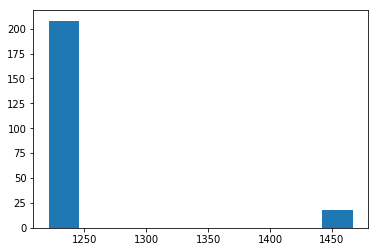

In [325]:
plt.hist(numpy.argmax(score_matrix, axis=0))

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [374]:
sns.set_style('darkgrid')

(array([1.000e+00, 3.000e+00, 3.000e+00, ..., 2.677e+03, 2.678e+03,
        2.680e+03]),
 array([0.00000000e+00, 9.99457112e-01, 1.99891422e+00, ...,
        1.83900109e+03, 1.84000054e+03, 1.84100000e+03]),
 <a list of 1842 Patch objects>)

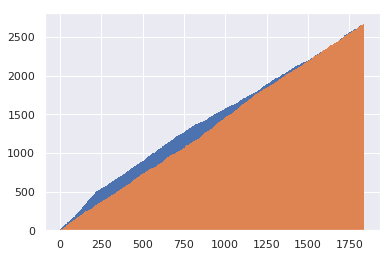

In [425]:
plt.hist(bgc_rank_list, cumulative=True, bins=len(test_set_spectra_reduced), linewidth=0)
plt.hist(bgc_rank_list_randomised, cumulative=True, bins=len(test_set_spectra_reduced), linewidth=0)


In [426]:
# top-1, top-5, top-10, top-20, top-200, auc

lim = len(test_set_spectra_reduced)
cumulative_data = 0
cumulative_rand = 0
for i in range(lim):
    data_top_n = len([x for x in bgc_rank_list if x < i])
    rand_top_n = len([x for x in bgc_rank_list_randomised if x < i])
    cumulative_data += data_top_n
    cumulative_rand += rand_top_n
auc_data = cumulative_data / (len(bgc_rank_list)*lim)
auc_rand = cumulative_rand / (len(bgc_rank_list)*lim)

top_n_data = []
top_n_rand = []
for i in (1, 5, 10, 20, 200):
    data_top_n = len([x for x in bgc_rank_list if x < i])
    rand_top_n = len([x for x in bgc_rank_list_randomised if x < i])
    top_n_data.append(data_top_n / len(bgc_rank_list))
    top_n_rand.append(rand_top_n / len(bgc_rank_list_randomised))
    
print('top-1 & top-5 & top-10 & top-20 & top-200 & AUC')
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_data, auc_data))
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_rand, auc_rand))

top-1 & top-5 & top-10 & top-20 & top-200 & AUC
0.0011 & 0.0060 & 0.0097 & 0.0194 & 0.1683 & 0.5366
0.0004 & 0.0026 & 0.0060 & 0.0093 & 0.1082 & 0.5004


In [427]:
0.65 * 0.85

0.5525

In [428]:
# Starting from a BGC, matching to a spectrum

In [429]:
spectrum_ranks = []
spectrum_ranks_randomised = []
for (bgc_wv, bgc_id), (spectrum_obj, spectrum_id) in zip(test_set_bgcs_final, test_set_spectra_final):
    bgc_idx = test_set_bgcs_reduced.index((bgc_wv, bgc_id))
    spec_idx = test_set_spectra_reduced.index((spectrum_obj, spectrum_id))
    
    spectrum_scores = score_matrix[spec_idx, :]
    bgc_scores = score_matrix[:, bgc_idx]
    
    spectrum_bgc_score = score_matrix[spec_idx, bgc_idx]
    sorted_scores = sorted(spectrum_scores, reverse=True)
    spectrum_rank = sorted_scores.index(spectrum_bgc_score)
    spectrum_ranks.append(spectrum_rank)
    random_score = numpy.random.choice(spectrum_scores)
    spectrum_rank_randomised = sorted_scores.index(random_score)
    spectrum_ranks_randomised.append(spectrum_rank_randomised)

(array([  12.,   26.,   35.,   47.,   59.,   69.,   77.,   90.,   97.,
         112.,  123.,  138.,  147.,  157.,  170.,  180.,  190.,  200.,
         211.,  223.,  234.,  248.,  264.,  272.,  286.,  297.,  310.,
         320.,  334.,  343.,  355.,  370.,  387.,  403.,  419.,  432.,
         444.,  458.,  469.,  474.,  483.,  497.,  508.,  523.,  529.,
         547.,  561.,  568.,  589.,  603.,  615.,  627.,  636.,  648.,
         657.,  663.,  673.,  684.,  699.,  715.,  732.,  744.,  758.,
         773.,  782.,  798.,  808.,  813.,  825.,  834.,  842.,  852.,
         861.,  875.,  883.,  897.,  910.,  916.,  925.,  937.,  954.,
         963.,  974.,  988., 1000., 1014., 1019., 1038., 1047., 1053.,
        1065., 1075., 1089., 1100., 1108., 1126., 1132., 1140., 1161.,
        1172., 1183., 1193., 1208., 1215., 1224., 1234., 1249., 1256.,
        1267., 1280., 1289., 1299., 1317., 1329., 1343., 1361., 1374.,
        1391., 1398., 1406., 1417., 1434., 1442., 1454., 1467., 1476.,
      

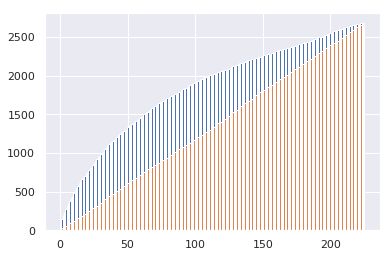

In [430]:
plt.hist(spectrum_ranks, cumulative=True, bins=len(test_set_bgcs_reduced))
plt.hist(spectrum_ranks_randomised, cumulative=True, bins=len(test_set_bgcs_reduced))


In [431]:
# top-1, top-5, top-10, top-20, top-200, auc

lim = len(test_set_bgcs_reduced)
cumulative_data = 0
cumulative_rand = 0
for i in range(lim):
    data_top_n = len([x for x in spectrum_ranks if x < i])
    rand_top_n = len([x for x in spectrum_ranks_randomised if x < i])
    cumulative_data += data_top_n
    cumulative_rand += rand_top_n
auc_data = cumulative_data / (len(spectrum_ranks)*lim)
auc_rand = cumulative_rand / (len(spectrum_ranks)*lim)

top_n_data = []
top_n_rand = []
for i in (1, 5, 10, 20, 200):
    data_top_n = len([x for x in spectrum_ranks if x < i])
    rand_top_n = len([x for x in spectrum_ranks_randomised if x < i])
    top_n_data.append(data_top_n / len(spectrum_ranks))
    top_n_rand.append(rand_top_n / len(spectrum_ranks_randomised))
    
print('top-1 & top-5 & top-10 & top-20 & top-200 & AUC')
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_data, auc_data))
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_rand, auc_rand))

top-1 & top-5 & top-10 & top-20 & top-200 & AUC
0.0299 & 0.1030 & 0.1657 & 0.2746 & 0.9485 & 0.6818
0.0045 & 0.0220 & 0.0418 & 0.0832 & 0.8899 & 0.4973


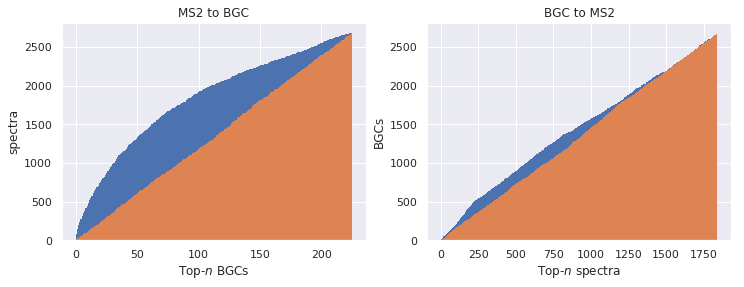

In [433]:
figure, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes

ax1.set_title('MS2 to BGC')
ax1.hist(spectrum_ranks, cumulative=True, bins=len(test_set_bgcs_reduced), linewidth=0)
ax1.hist(spectrum_ranks_randomised, cumulative=True, bins=len(test_set_bgcs_reduced), linewidth=0)
ax1.set_xlabel('Top-$n$ BGCs')
ax1.set_ylabel('spectra')

ax2.set_title('BGC to MS2')
ax2.hist(bgc_rank_list, cumulative=True, bins=len(test_set_spectra_reduced), linewidth=0)
ax2.hist(bgc_rank_list_randomised, cumulative=True, bins=len(test_set_spectra_reduced), linewidth=0)
ax2.set_xlabel('Top-$n$ spectra')
ax2.set_ylabel('BGCs')

plt.savefig('joint_iokr_topn_individual.pdf')

In [406]:
bgc_id_list = [x[1] for x in test_set_bgcs_reduced]

bgc_rank_list = []
bgc_rank_rand_list = []

cnt = 0
for bgc_id, spectrum_pairs in bgc_spectra_mapping.items():
    bgc_idx = bgc_id_list.index(bgc_id)
    bgc_match_rank = len(test_set_spectra_final)
    bgc_match_rank_rand = len(test_set_spectra_final)
    bgc_scores = score_matrix[:, bgc_idx]
    bgc_scores_sorted = sorted(bgc_scores, reverse=True)
    bgc_scores_scrambled = copy.copy(bgc_scores_sorted)
    numpy.random.shuffle(bgc_scores_scrambled)
    for spectrum_obj, spectrum_id in spectrum_pairs:
        spectrum_index = test_set_spectra_reduced.index((spectrum_obj, spectrum_id))
        spec_bgc_score = bgc_scores[spectrum_index]
        spec_rank = bgc_scores_sorted.index(spec_bgc_score)
        if spec_rank < bgc_match_rank:
            bgc_match_rank = spec_rank
        spec_bgc_score_rand = bgc_scores_scrambled[spectrum_index]
        spec_rank_rand = bgc_scores_sorted.index(spec_bgc_score_rand)
        if spec_rank_rand < bgc_match_rank_rand:
            bgc_match_rank_rand = spec_rank_rand

    bgc_rank_list.append(bgc_match_rank)
    bgc_rank_rand_list.append(bgc_match_rank_rand)


In [407]:
# top-1, top-5, top-10, top-20, top-200, auc

lim = len(test_set_spectra_reduced)
cumulative_data = 0
cumulative_rand = 0
for i in range(lim):
    data_top_n = len([x for x in bgc_rank_list if x < i])
    rand_top_n = len([x for x in bgc_rank_rand_list if x < i])
    cumulative_data += data_top_n
    cumulative_rand += rand_top_n
auc_data = cumulative_data / (len(bgc_rank_list)*lim)
auc_rand = cumulative_rand / (len(bgc_rank_rand_list)*lim)

top_n_data = []
top_n_rand = []
for i in (1, 5, 10, 20, 200):
    data_top_n = len([x for x in bgc_rank_list if x < i])
    rand_top_n = len([x for x in bgc_rank_rand_list if x < i])
    top_n_data.append(data_top_n / len(bgc_rank_list))
    top_n_rand.append(rand_top_n / len(bgc_rank_rand_list))
    
print('top-1 & top-5 & top-10 & top-20 & top-200 & AUC')
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_data, auc_data))
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_rand, auc_rand))

top-1 & top-5 & top-10 & top-20 & top-200 & AUC
0.0133 & 0.0177 & 0.0265 & 0.0398 & 0.4469 & 0.7485
0.0044 & 0.0265 & 0.0575 & 0.0973 & 0.4823 & 0.7513


In [413]:
spectrum_bgc_mapping = {}
for a, b in zip(test_set_bgcs_final, test_set_spectra_final):
    spec_vec, spec_id = b
    if spec_id in spectrum_bgc_mapping:
        spectrum_bgc_mapping[spec_id].append(a)
    else:
        spectrum_bgc_mapping[spec_id] = [a]

In [417]:
spectrum_ranks = []
spectrum_ranks_randomised = []

spectrum_id_list = [x[1] for x in test_set_spectra_reduced]
bgc_id_list = [x[1] for x in test_set_bgcs_reduced]


for spectrum_id, bgc_pairs in spectrum_bgc_mapping.items():
    spectrum_match_rank = len(test_set_bgcs_final)
    spectrum_match_rank_rand = len(test_set_bgcs_final)

    spec_idx = spectrum_id_list.index(spectrum_id)

    spectrum_scores = score_matrix[spec_idx, :]

    sorted_scores = sorted(spectrum_scores, reverse=True)
    randomised_scores = copy.copy(spectrum_scores)
    numpy.random.shuffle(randomised_scores)
    
    for bgc_obj, bgc_id in bgc_pairs:
        bgc_idx = bgc_id_list.index(bgc_id)
        
        spectrum_bgc_score = spectrum_scores[bgc_idx]
        
        spectrum_rank = sorted_scores.index(spectrum_bgc_score)
        
        if spectrum_rank < spectrum_match_rank:
            spectrum_match_rank = spectrum_rank

        random_score = randomised_scores[bgc_idx]
        spectrum_rank_randomised = sorted_scores.index(random_score)
        
        if spectrum_rank_randomised < spectrum_match_rank_rand:
            spectrum_match_rank_rand = spectrum_rank_randomised

    spectrum_ranks.append(spectrum_match_rank)
    spectrum_ranks_randomised.append(spectrum_match_rank_rand)    


In [419]:
# top-1, top-5, top-10, top-20, top-200, auc

lim = len(test_set_bgcs_reduced)
cumulative_data = 0
cumulative_rand = 0
for i in range(lim):
    data_top_n = len([x for x in spectrum_ranks if x < i])
    rand_top_n = len([x for x in spectrum_ranks_randomised if x < i])
    cumulative_data += data_top_n
    cumulative_rand += rand_top_n
auc_data = cumulative_data / (len(spectrum_ranks)*lim)
auc_rand = cumulative_rand / (len(spectrum_ranks_randomised)*lim)

top_n_data = []
top_n_rand = []
for i in (1, 5, 10, 20, 200):
    data_top_n = len([x for x in spectrum_ranks if x < i])
    rand_top_n = len([x for x in spectrum_ranks_randomised if x < i])
    top_n_data.append(data_top_n / len(spectrum_ranks))
    top_n_rand.append(rand_top_n / len(spectrum_ranks_randomised))
    
print('top-1 & top-5 & top-10 & top-20 & top-200 & AUC')
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_data, auc_data))
print('{:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f} & {:.04f}'.format(*top_n_rand, auc_rand))

top-1 & top-5 & top-10 & top-20 & top-200 & AUC
0.0407 & 0.1243 & 0.1933 & 0.3094 & 0.9712 & 0.7081
0.0109 & 0.0385 & 0.0657 & 0.1200 & 0.9142 & 0.5592


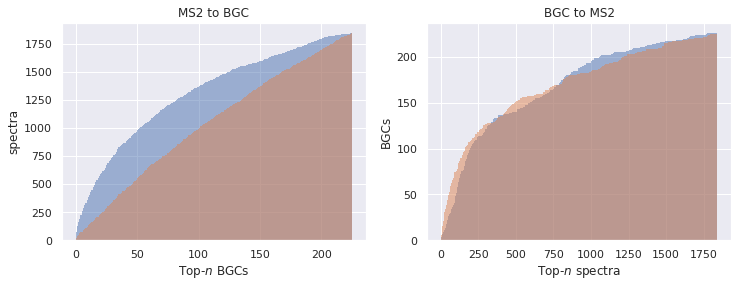

In [421]:
figure, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes

ax1.set_title('MS2 to BGC')
ax1.hist(spectrum_ranks, cumulative=True, bins=len(test_set_bgcs_reduced), linewidth=0, alpha=0.5)
ax1.hist(spectrum_ranks_randomised, cumulative=True, bins=len(test_set_bgcs_reduced), linewidth=0, alpha=0.5)
ax1.set_xlabel('Top-$n$ BGCs')
ax1.set_ylabel('spectra')

ax2.set_title('BGC to MS2')
ax2.hist(bgc_rank_list, cumulative=True, range=[0, len(test_set_spectra_reduced)], bins=len(test_set_spectra_reduced), linewidth=0, alpha=0.5)
ax2.hist(bgc_rank_rand_list, cumulative=True, range=[0, len(test_set_spectra_reduced)], bins=len(test_set_spectra_reduced), linewidth=0, alpha=0.5)
ax2.set_xlabel('Top-$n$ spectra')
ax2.set_ylabel('BGCs')

plt.savefig('joint_iokr_topn.pdf')